머신러닝을 이해하는데 
실제로 파이썬을 사용해 회귀와 분류를 구현해 이해를 해보도록 합니다.

# 회귀

## 학습데이터
시각화를 통해 점 그래프로 나타내어 본다.

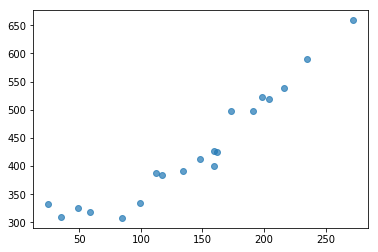

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터를 불러옵니다.
train = np.loadtxt('./data/test.csv', delimiter=',', skiprows=1)
x_train, y_train = train[:,0], train[:,1]

# 시각화
plt.plot(x_train,y_train, 'o', alpha = 0.7)

일단은 1 차함수로 구현합니다. 
목적함수도 구현합니다.


In [19]:
# 변수를 초기화합니다.
theta0 = np.random.rand()
theta1 = np.random.rand()

def f(x):
    '''예측함수'''
    return theta0 + theta1 * x

def E(x, y):
    '''목적함수'''
    return 0.5 * np.sum((y-f(x)) ** 2)

# z-score 정규화
mu = x_train.mean()
sigma = x_train.std()

def standardize(x):
    '''표준화 함수'''
    return (x - mu)/sigma

z_train = standardize(x_train)

변환된 z_train을 이용해 시각화를 하면 가로축의 스케일이 변한 것을 알 수 있습니다.

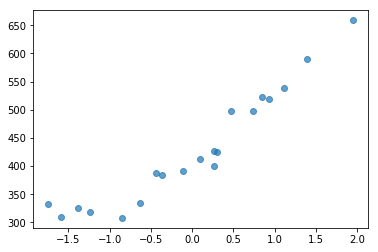

In [25]:
# 시각화
plt.plot(z_train,y_train, 'o', alpha = 0.7)

이제 매개변수를 갱신하는 것은 구현합니다. 갱신식은 다음과 같습니다.

<수학수식 넣기>


In [27]:
eta  = 0.01 # 학습률
diff = 1 # 오차의 차분
count = 0 # 갱신횟수
error = E(z_train, y_train)
while diff > 0.01:
    temp0 = theta0 - eta * np.sum((f(z_train) - y_train))
    temp1 = theta1 - eta * np.sum((f(z_train) - y_train) * z_train)
    theta0, theta1 = temp0, temp1
    current_error = E(z_train, y_train)
    diff = error - current_error
    error = current_error
    # 로그 출력
    count += 1
    log = '{} 번째: theta0 = {:.3f}, theta1 = {:.3f}, 차분 = {:.3f}'
    print(log.format(count, theta0, theta1, diff))

1 번째: theta0 = 429.121, theta1 = 93.472, 차분 = 0.005


학습결과를 시각화해서 살펴봅니다.

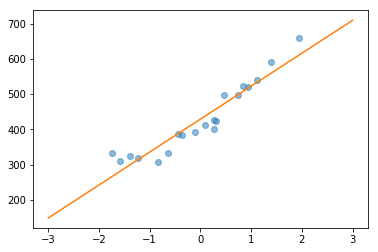

In [28]:
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o', alpha = 0.5)
plt.plot(x, f(x))

# 다항식 회귀 구현


1회째: theta = [ 86.22266052  19.22233409  89.97659635], 차분 = 1170439.5944
2회째: theta = [ 136.81280914   35.32175988  123.75398327], 차분 = 309485.4865
3회째: theta = [ 170.52945066   48.66985429  132.92037185], 차분 = 118908.9462
4회째: theta = [ 195.66948616   59.4754843   131.53493752], 차분 = 68216.4323
5회째: theta = [ 216.05860142   68.10076982  125.87500263], 차분 = 48855.9735
6회째: theta = [ 233.50188061   74.92248464  118.72284116], 차분 = 38000.8057
7회째: theta = [ 248.88693626   80.28064301  111.29274209], 차분 = 30435.9137
8회째: theta = [ 262.68100059   84.46410072  104.09714115], 차분 = 24693.1032
9회째: theta = [ 275.15537224   87.71105082   97.33577407], 차분 = 20185.8773
10회째: theta = [ 286.48714298   90.21481844   91.0703992 ], 차분 = 16589.5577
11회째: theta = [ 296.80563454   92.13092039   85.30313112], 차분 = 13689.2692
12회째: theta = [ 306.21388141   93.58379946   80.01145608], 차분 = 11331.5637
13회째: theta = [ 314.79881391   94.67269755   75.16378856], 차분 = 9402.8853
14회째: theta = [ 322.63629342   95.

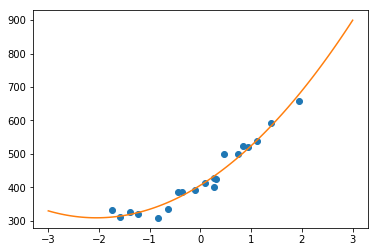

In [32]:
# 학습 데이터를 읽는다
train = np.loadtxt('./data/test.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# 표준화
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# 매개변수를 초기화한다
theta = np.random.rand(3)

# 학습 데이터 행렬을 만든다
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

X = to_matrix(train_z)

# 예측함수
def f(x):
    return np.dot(x, theta)

# 목적함수
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)


# 학습률
ETA = 0.01

# 오차의 차분
diff = 1

# 갱신 횟수
count = 0

# 오차의 차분이 0.01이하가 될 때까지 매개변수 갱신을 반복한다
error = E(X, train_y)
while diff > 0.01:
    # 갱신 결과를 임시변수에 저장한다
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # 이전 회의 오차와의 차분을 계산한다
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

    # 로그를 출력한다
    count += 1
    log = '{}회째: theta = {}, 차분 = {:.4f}'
    print(log.format(count, theta, diff))

# 그래프로 나타낸다
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()
            


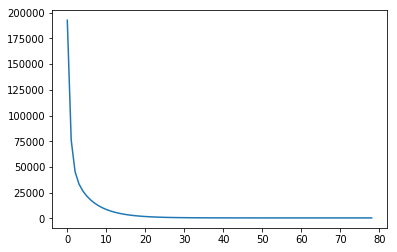

In [36]:
def MSE(x, y):
    '''평균제곱오차'''
    return (1 / x.shape[0] * np.sum((y-f(x)) ** 2 ))

theta = np.random.rand(3)
errors = []
diff = 1
errors.append(MSE(X, train_y))
while diff > 0.01:
            theta = theta - ETA *np.dot(f(X) - train_y, X)
            errors.append(MSE(X, train_y))
            diff = errors[-2] - errors[-1]
            
x = np.arange(len(errors))
plt.plot(x, errors)
plt.show()